# Iris

Exploring the iris dataset and building some models.

## Prereqs

- python=3.8
- install requirements.txt


In [1]:
print("hello world")

hello world


## Get Data

Get the iris data from Azure.

In [2]:
data_uri = "https://azuremlexamples.blob.core.windows.net/datasets/iris.csv"
data_uri

'https://azuremlexamples.blob.core.windows.net/datasets/iris.csv'

In [3]:
import pandas as pd

df = pd.read_csv(data_uri)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis (EDA)

Explore the data.

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
labels = set(df.species)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [6]:
kbs = df.memory_usage(deep=True, index=True).sum() / 1e3
kbs

15.478

let's save some bytes

In [7]:
df.species = df.species.str.replace("Iris-", "")

labels = set(df.species)
labels

{'setosa', 'versicolor', 'virginica'}

In [8]:
kbs = df.memory_usage(deep=True, index=True).sum() / 1e3
kbs

14.728

setup plotting with seaborn and matplotlib

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

let's plot ``sepal_length`` vs ``sepal_width``

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

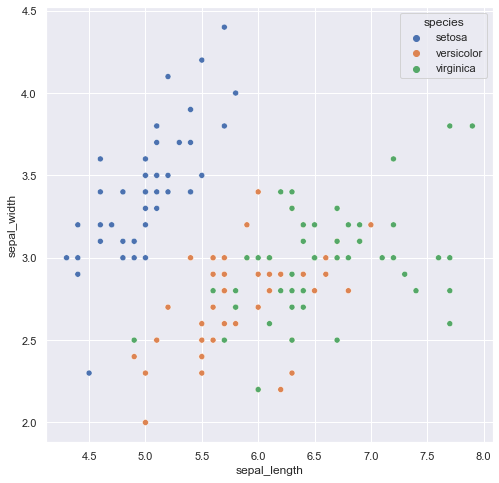

In [10]:
f, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

let's plot ``petal_length`` vs ``petal_width``

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

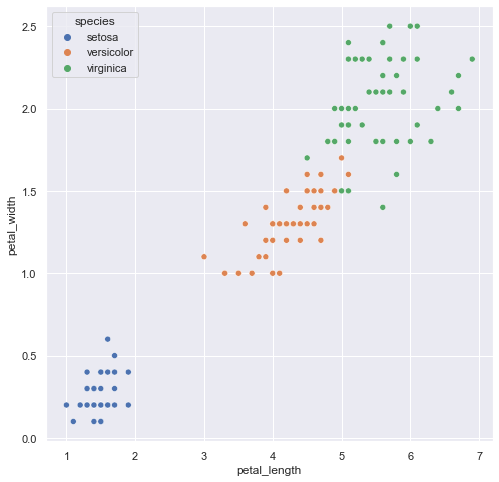

In [11]:
f, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

since there are only 4 features and they are all reasonable scaled numbers, we can simply visualize all combinations of features in 2D to get a sense of how we can separate the species

In [12]:
features = ["petal_width", "petal_length", "sepal_width", "sepal_length"]
features

['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

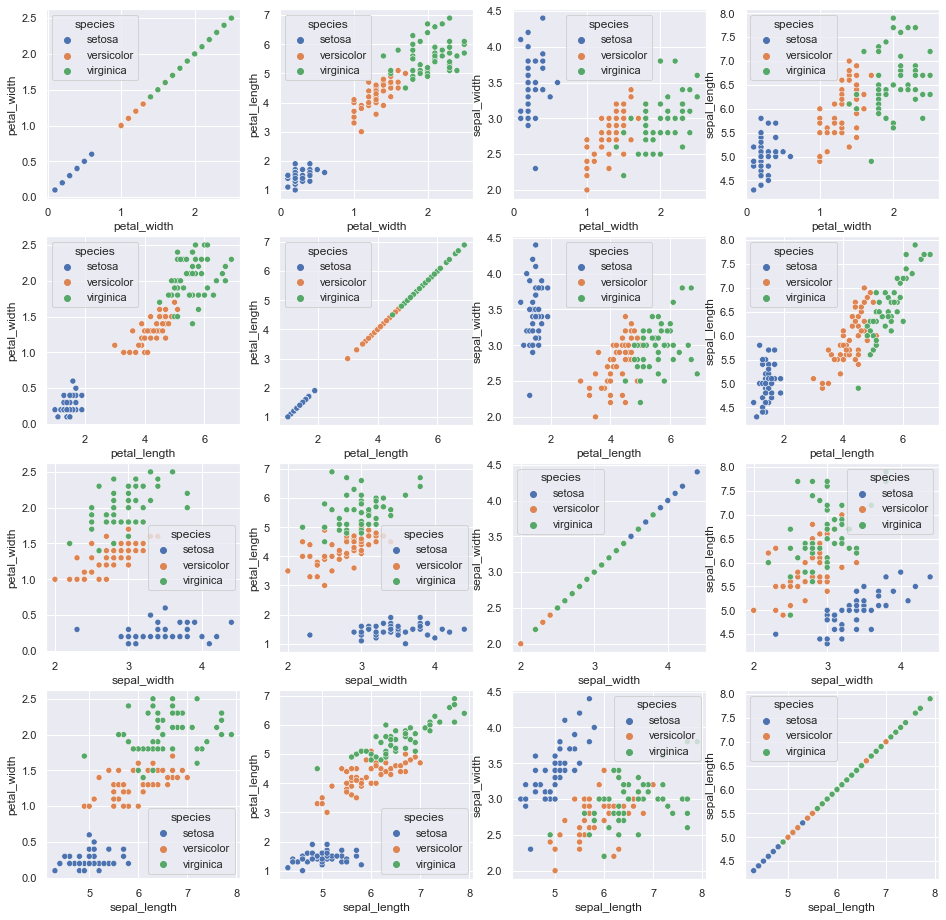

In [13]:
n = len(features)

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 16))

for i in range(n):
    for j in range(n):
        x = features[i]
        y = features[j]

        sns.scatterplot(data=df, x=x, y=y, hue="species", ax=axes[i, j])

## Feature Engineering

Create some new features.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df["f5"] = df.petal_width ** 2 + df.petal_length ** 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   f5            150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


<AxesSubplot:xlabel='f5', ylabel='sepal_width'>

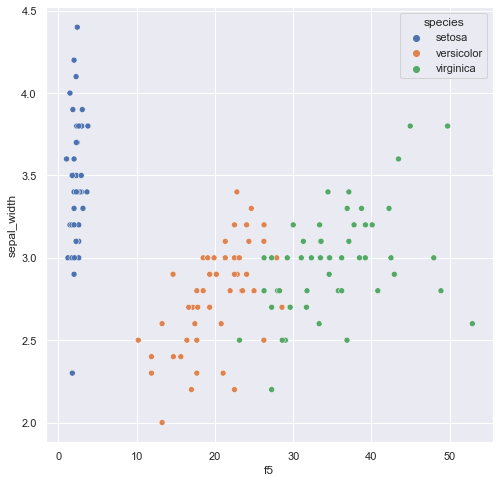

In [16]:
f, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=df, x="f5", y="sepal_width", hue="species")

In [17]:
features = ["petal_width", "petal_length", "sepal_width", "sepal_length"]
features

['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

## Docs

In [18]:
sns.scatterplot?

Signature:
sns.scatterplot(
    *,
    x=None,
    y=None,
    hue=None,
    style=None,
    size=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    x_bins=None,
    y_bins=None,
    units=None,
    estimator=None,
    ci=95,
    n_boot=1000,
    alpha=None,
    x_jitter=None,
    y_jitter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue``